In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from we import * 

## Initiate model

In [2]:
# Model name is among ['flaubert/flaubert_small_cased', 'flaubert/flaubert_base_uncased',
#               'flaubert/flaubert_base_cased', 'flaubert/flaubert_large_cased']

modelname = 'flaubert/flaubert_small_cased'
flaubert, flaubert_tokenizer, log = initiate_model(modelname)

Some weights of the model checkpoint at flaubert/flaubert_small_cased were not used when initializing FlaubertModel: ['pred_layer.proj.bias', 'pred_layer.proj.weight']
- This IS expected if you are initializing FlaubertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing FlaubertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


## Compare WE of word pairs

We will create 2 pairs of embedding for singular and plural nouns: one pair is using inflection with `-s`, another pair uses the inflection pair `au`->`aux` and store in a Pandas DataFrame.

In [7]:
df = create_words_df(flaubert, flaubert_tokenizer, ['pomme', 'pommes', 'oiseau', 'oiseaux'], transposed=False)
df

,pomme,pommes,oiseau,oiseaux
0,-0.789583,2.870298,8.625494,4.051764
1,0.173690,2.873069,2.405889,-0.354589
2,2.101598,-0.319898,-1.324769,-2.143469
3,1.687404,3.300869,0.028446,-1.254749
4,1.308981,2.539638,3.579112,5.393857
...,...,...,...,...
507,-3.022486,-4.887702,-0.263529,2.995455
508,-2.054853,-1.295427,-2.647445,-3.688531
509,-7.838132,-5.978479,-0.322017,-3.423790
510,2.746323,1.209072,4.533642,5.523484


In [ ]:
pomme_we = get_we(flaubert, flaubert_tokenizer, 'pomme')
pommes_we = get_we(flaubert, flaubert_tokenizer, 'pommes')

oiseau_we = get_we(flaubert, flaubert_tokenizer, 'oiseau')
oiseaux_we = get_we(flaubert, flaubert_tokenizer, 'oiseaux')

We will now store the WE in a Pandas DataFrame.

In [ ]:
df = pd.DataFrame(columns=['dim', 'pomme', 'pommes', 'oiseau', 'oiseaux'])
df.dim = range(512)
df.pomme = pomme_we
df.pommes = pommes_we
df.oiseau = oiseau_we
df.oiseaux = oiseaux_we
df

We can visualize how the dimensions look like for all 4 words:

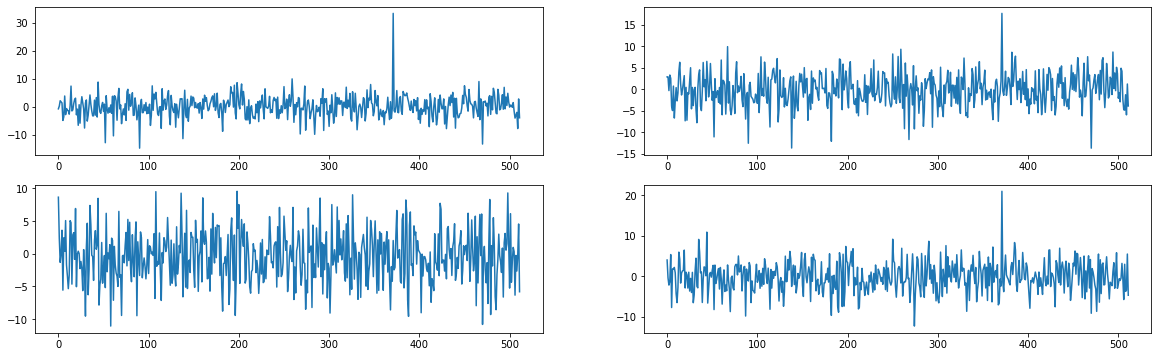

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(20, 6))

ax[0][0].plot(range(512), df['pomme'])
ax[0][1].plot(range(512), df['pommes'])

ax[1][0].plot(range(512), df['oiseau'])
ax[1][1].plot(range(512), df['oiseaux'])

plt.show()

We can see that embeddings for `pomme`, `pomme` and `oiseaux` seem to have a spike in the positive direction.
We can compare indeces of maximums and minimums of the 4 words.

In [9]:
print(
f"""
Pomme: Indeces of minimums: {list(df['pomme'].sort_values().index[:5])}, Indeces of maximums: {list(df['pomme'].sort_values().index[-5:])}
Pommes: Indeces of minimums: {list(df['pommes'].sort_values().index[:5])}, Indeces of maximums: {list(df['pommes'].sort_values().index[-5:])}


Oiseau: Indeces of minimums: {list(df['oiseau'].sort_values().index[:5])}, Indeces of maximums: {list(df['oiseau'].sort_values().index[-5:])}
Oiseaux: Indeces of minimums: {list(df['oiseaux'].sort_values().index[:5])}, Indeces of maximums: {list(df['oiseaux'].sort_values().index[-5:])}
"""
)


Pomme: Indeces of minimums: [90, 470, 52, 138, 61], Indeces of maximums: [198, 44, 466, 259, 371]
Pommes: Indeces of minimums: [470, 138, 90, 182, 268], Indeces of maximums: [382, 494, 259, 67, 371]


Oiseau: Indeces of minimums: [58, 470, 388, 30, 87], Indeces of maximums: [326, 136, 498, 108, 198]
Oiseaux: Indeces of minimums: [274, 87, 182, 470, 190], Indeces of maximums: [290, 35, 250, 44, 371]



We can see that there is quite a lot of overlap in maximums and minimums for `pomme` and `pommes`: minimums at dimensions `90`,`470`, `138` and maximums at `371` and `259`.

As for `oiseau` and `oiseaux`, it seems like there is much less overlap: they both have a minimum at dimension `470` and `87` and no overlap at dimensions of maximums. However, it is interesting that `oiseaux` has the spike at the same dimension `371`.

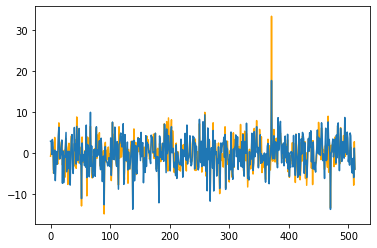

In [10]:
plt.plot(range(512), df['pomme'], color='orange')
plt.plot(range(512), df['pommes'])

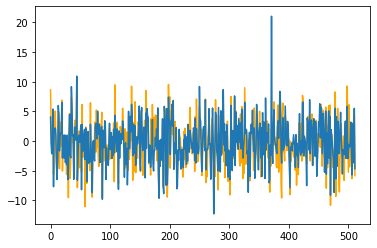

In [11]:
plt.plot(range(512), df['oiseau'], color='orange')
plt.plot(range(512), df['oiseaux'])

It appears that for both multiple dimensions are changing their values in both directions.

# Difference between values of dimensions of pairs

We will now create a new column calculating difference of each dimension for both pairs.

In [12]:
df['p_diff'] = abs(df.pomme - df.pommes)
df['o_diff'] = abs(df.oiseau - df.oiseaux)

In [13]:
df

,pomme,pommes,oiseau,oiseaux,p_diff,o_diff
0,-0.789583,2.870298,8.625494,4.051764,3.659881,4.573730
1,0.173690,2.873069,2.405889,-0.354589,2.699379,2.760478
2,2.101598,-0.319898,-1.324769,-2.143469,2.421496,0.818700
3,1.687404,3.300869,0.028446,-1.254749,1.613466,1.283195
4,1.308981,2.539638,3.579112,5.393857,1.230657,1.814745
...,...,...,...,...,...,...
507,-3.022486,-4.887702,-0.263529,2.995455,1.865216,3.258984
508,-2.054853,-1.295427,-2.647445,-3.688531,0.759426,1.041085
509,-7.838132,-5.978479,-0.322017,-3.423790,1.859653,3.101774
510,2.746323,1.209072,4.533642,5.523484,1.537251,0.989842


We can visualize this difference for both `p_diff` and `o_diff`:

Text(0.5, 1.0, 'Oiseau/oiseaux difference')

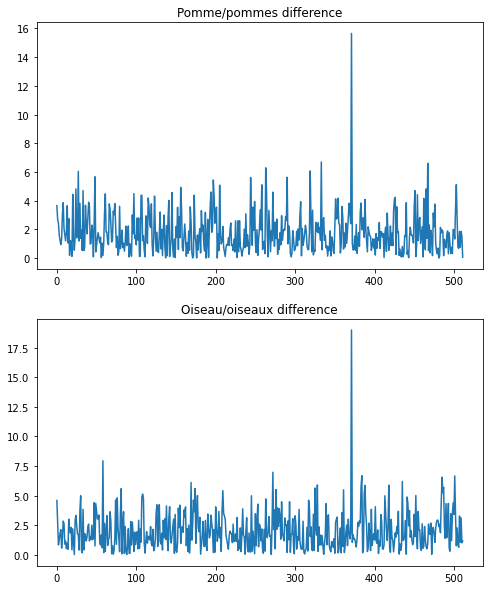

In [14]:
fig, ax = plt.subplots(2, figsize=(8, 10))

ax[0].plot(range(512), df['p_diff'])
ax[0].set_title('Pomme/pommes difference')

ax[1].plot(range(512), df['o_diff'])
ax[1].set_title('Oiseau/oiseaux difference')


If we plot 2 difference on top of each other to see the overlap, we can see that the difference of `pomme/s` and `oiseau/x` also differ in multiple dimensions simultaneously. 

Text(0.5, 1.0, 'Difference of oiseau/x in orange, pomme/s in blue')

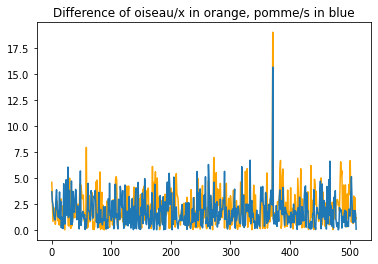

In [15]:
plt.plot(range(512), df['o_diff'], color='orange')
plt.plot(range(512), df['p_diff'])
plt.title('Difference of oiseau/x in orange, pomme/s in blue')

## Dimensions with closest and furthest values between pairs

We will now sort the dataframe first by `p_diff` and then by `o_diff` to find the closest and furthest dimensions for both pairs. We will analyze top 5% closest dimensions and bottom 5% closest dimensions for both pairs.

In [16]:
df.sort_values('p_diff')

,pomme,pommes,oiseau,oiseaux,p_diff,o_diff
481,-1.149791,-1.139267,-1.872658,-4.241241,0.010524,2.368583
188,2.357234,2.368219,2.926783,3.745159,0.010984,0.818375
202,4.795053,4.782814,1.274314,2.393198,0.012240,1.118885
171,3.845696,3.828545,6.157597,3.620735,0.017151,2.536861
176,4.805288,4.822771,4.384145,0.634487,0.017483,3.749658
...,...,...,...,...,...,...
319,6.953439,0.874482,4.557711,3.035436,6.078958,1.522274
263,-2.911643,-9.205585,-5.997969,-1.286199,6.293943,4.711770
467,-4.666477,1.949474,5.987657,5.078243,6.615952,0.909414
333,0.123309,-6.584016,0.215944,-0.595359,6.707325,0.811303


In [21]:
closest_dim_p = df.sort_values('p_diff').index[:26]
furthest_dim_p = df.sort_values('p_diff').index[-26:]

In [22]:
closest_dim_o = df.sort_values('o_diff').index[:26]
furthest_dim_o = df.sort_values('o_diff').index[-26:]

Now we can check if there is any intersection between the closest dimensions of `pomme` and `oiseau`.

In [23]:
set(closest_dim_o).intersection(set(closest_dim_p))

{91, 111}

In [24]:
set(furthest_dim_o).intersection(set(furthest_dim_p))

{272, 371}

We have only two intersection for closest dimensions: dimension `91` and `111`. We can make a hypothesis that one of them can represent `Noun` or `Gender`.

As for the furthest values, we have `272` and `371` and the dimension `371` being one of the peaks of the original dimension. We can make a hypothesis that one of these dimensions is responsible for the multiplicity or this is due to the words ending on a different character.

## Dimensions with the closest and furthest values for pair of singular nouns

Now we can compare the diffence of values of 2 singular nouns - `pomme` and `oiseau`.

If `91` or `111` represent `Noun`, we should expect that embeddings of `pomme` and `oiseau` have the values of these dimensions close.

If `91` or `111` represent `Gender`, we should expect to see these dimensions in the list of the furthests.

If `272` or `371` represent multiplicity, we should expect to see this dimension in the closest list, since both nouns are singular.

If `272` or `371` represent the last character of the word representation, we can expect them to be in the list of the furthest dimensions since `pomme` ends with `e` and `oiseau` with `u`.

In [25]:
closest_dim_sing = abs(df.pomme - df.oiseau).sort_values()[:26].index
furthest_dim_sing = abs(df.pomme - df.oiseau).sort_values()[-26:].index

In [26]:
set(closest_dim_sing).intersection({91, 111, 272, 371})

set()

In [27]:
set(furthest_dim_sing).intersection({91, 111, 272, 371})

{371}

We have dimension `371` in the furthest list, potentially signalling that this dimension represents the word end and doesn't carry grammatical information.

We can as well look at how close the values are in all of these dimensions:

In [28]:
dim_df = pd.DataFrame(columns=['d91', 'd111', 'd272', 'd371'])

In [29]:
dim_df['d91'] = [abs(df.pomme - df.oiseau).at[91]]
dim_df['d111'] = [abs(df.pomme - df.oiseau).at[111]]
dim_df['d272'] = [abs(df.pomme - df.oiseau).at[272]]
dim_df['d371'] = [abs(df.pomme - df.oiseau).at[371]]
dim_df

,d91,d111,d272,d371
0,2.495064,1.544467,2.325571,31.315603


We can see that values of `d371` are the furthest by far the difference between other dimension is pretty equal.

## Dimensions with the closest and furthest values for pair of singular nouns

Now we can compare the diffence of values of 2 plural nouns - `pommes` and `oiseaux`.

If `91` or `111` represent `Noun`, we should expect that embeddings of `pommes` and `oiseaux` have the values of these dimensions close.

If `91` or `111` represent `Gender`, we should expect to see these dimensions in the list of the furthests.

If `272` or `371` represent multiplicity, we should expect to see this dimension in the closest list, since both nouns are plural.

If `272` or `371` represent the last character of the word representation, we can expect them to be in the list of the furthest dimensions since `pommes` ends with `s` and `oiseaux` with `x`.

In [30]:
closest_dim_sing = abs(df.pommes - df.oiseaux).sort_values()[:26].index
furthest_dim_sing = abs(df.pommes - df.oiseaux).sort_values()[-26:].index

In [31]:
set(closest_dim_sing).intersection({91, 111, 272, 371})

set()

In [32]:
set(furthest_dim_sing).intersection({91, 111, 272, 371})

{272}

Now we have only one intersection with `272` having the furthest values for both nouns. It potentially can be as well related to word endings.

However, we can see that the difference in the values is much less prominent than we saw for dimension `371` above.

In [34]:
dim_df2 = pd.DataFrame(columns=['d91', 'd111', 'd272', 'd371'])
dim_df2['d91'] = [abs(df.pommes - df.oiseaux).at[91]]
dim_df2['d111'] = [abs(df.pommes - df.oiseaux).at[111]]
dim_df2['d272'] = [abs(df.pommes - df.oiseaux).at[272]]
dim_df2['d371'] = [abs(df.pommes - df.oiseaux).at[371]]
dim_df2

,d91,d111,d272,d371
0,2.50982,1.513092,9.246571,3.353041


## Experiment with same gender and same inflection type

Now we can check if we have any different results if we use nouns of the same gender and the same inflection scheme:
`-s`. We can work with `pomme/s` and `femme/s`.

In [35]:
femme_we = get_we(flaubert, flaubert_tokenizer, 'femme')
femmes_we = get_we(flaubert, flaubert_tokenizer, 'femmes')

We can add the new pair to the dataframe:

In [36]:
df['femme'] = femme_we
df['femmes'] = femmes_we
df

,pomme,pommes,oiseau,oiseaux,p_diff,o_diff,femme,femmes
0,-0.789583,2.870298,8.625494,4.051764,3.659881,4.573730,1.250606,1.972973
1,0.173690,2.873069,2.405889,-0.354589,2.699379,2.760478,-0.609186,-0.691200
2,2.101598,-0.319898,-1.324769,-2.143469,2.421496,0.818700,2.759072,4.054496
3,1.687404,3.300869,0.028446,-1.254749,1.613466,1.283195,-2.650006,-1.391883
4,1.308981,2.539638,3.579112,5.393857,1.230657,1.814745,2.289926,3.119220
...,...,...,...,...,...,...,...,...
507,-3.022486,-4.887702,-0.263529,2.995455,1.865216,3.258984,-7.861737,-4.760276
508,-2.054853,-1.295427,-2.647445,-3.688531,0.759426,1.041085,-4.726769,-4.160974
509,-7.838132,-5.978479,-0.322017,-3.423790,1.859653,3.101774,-0.187649,0.520152
510,2.746323,1.209072,4.533642,5.523484,1.537251,0.989842,-0.666923,-3.463926


We can plot the distibution of dimension values for `femme/s` and compare it with `pomme/s`.

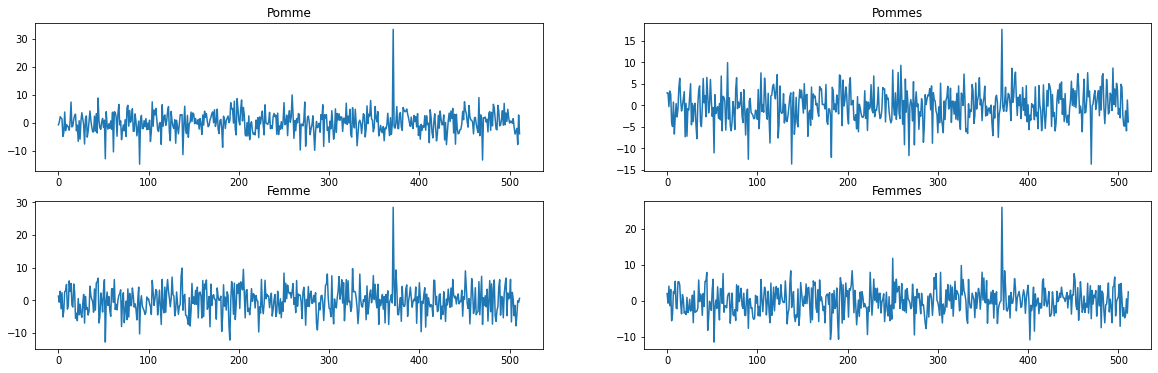

In [37]:
fig, ax = plt.subplots(2, 2, figsize=(20, 6))

ax[0][0].plot(range(512), df['pomme'])
ax[0][0].set_title('Pomme')
ax[0][1].plot(range(512), df['pommes'])
ax[0][1].set_title('Pommes')


ax[1][0].plot(range(512), df['femme'])
ax[1][0].set_title('Femme')
ax[1][1].plot(range(512), df['femmes'])
ax[1][1].set_title('Femmes')


plt.show()

We can see that there is a similar peak in all 4 WE. We can compare the indeces of maximums and minimums for the 2 pairs:

In [38]:
print(
f"""
Pomme: Indeces of minimums: {list(df['pomme'].sort_values().index[:5])}, Indeces of maximums: {list(df['pomme'].sort_values().index[-5:])}
Pommes: Indeces of minimums: {list(df['pommes'].sort_values().index[:5])}, Indeces of maximums: {list(df['pommes'].sort_values().index[-5:])}


Femme: Indeces of minimums: {list(df['femme'].sort_values().index[:5])}, Indeces of maximums: {list(df['femme'].sort_values().index[-5:])}
Femmes: Indeces of minimums: {list(df['femmes'].sort_values().index[:5])}, Indeces of maximums: {list(df['femmes'].sort_values().index[-5:])}
"""
)


Pomme: Indeces of minimums: [90, 470, 52, 138, 61], Indeces of maximums: [198, 44, 466, 259, 371]
Pommes: Indeces of minimums: [470, 138, 90, 182, 268], Indeces of maximums: [382, 494, 259, 67, 371]


Femme: Indeces of minimums: [52, 190, 90, 222, 402], Indeces of maximums: [374, 205, 326, 137, 371]
Femmes: Indeces of minimums: [52, 402, 181, 190, 274], Indeces of maximums: [374, 205, 326, 250, 371]



There is quite a big overlap between minimums and maximums of `femme` and `femmes` WE, however, seemingly not a lot of overlap of `pomme`/`femme` and `pommes`/`femmes`. We can try seeing this by plotting one on top of another:

Text(0.5, 1.0, 'Pommes/femmes difference')

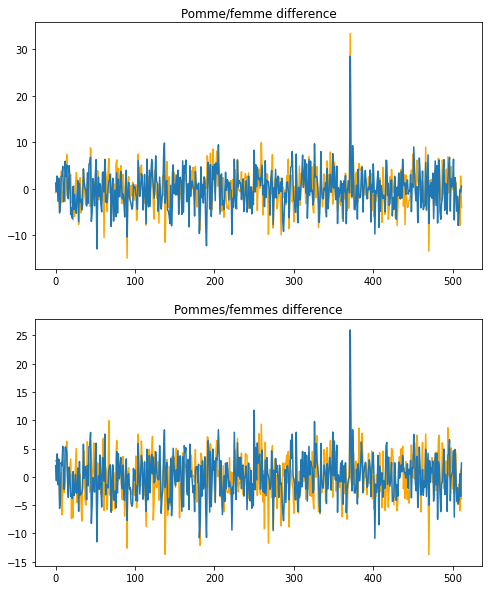

In [39]:
fig, ax = plt.subplots(2, figsize=(8, 10))

ax[0].plot(range(512), df['pomme'], color='orange')
ax[0].plot(range(512), df['femme'])
ax[0].set_title('Pomme/femme difference')

ax[1].plot(range(512), df['pommes'], color='orange')
ax[1].plot(range(512), df['femmes'])
ax[1].set_title('Pommes/femmes difference')

Now same as above we can look into differences between values of dimensions of `femme` and `femmes`.

In [40]:
df['f_diff'] = abs(df.femme - df.femmes)

We can now plot this difference and compare it with the differences of `pomme/pommes`.

Text(0.5, 1.0, 'Difference of femme/s in orange, pomme/s in blue')

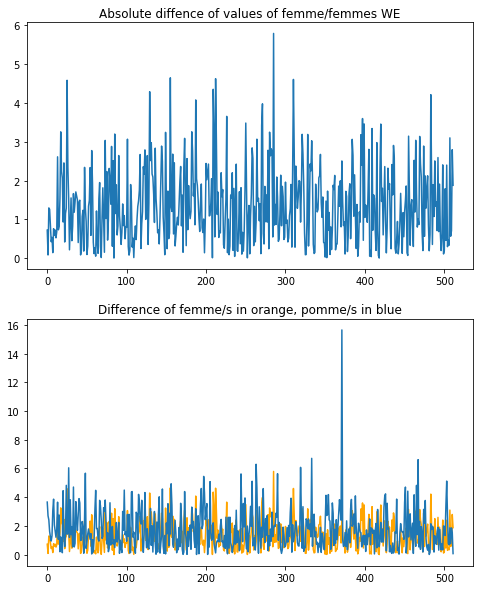

In [41]:
fig, ax = plt.subplots(2, figsize=(8, 10))

ax[0].plot(range(512), df['f_diff'])
ax[0].set_title('Absolute diffence of values of femme/femmes WE')


ax[1].plot(range(512), df['f_diff'], color='orange')
ax[1].plot(range(512), df['p_diff'])
ax[1].set_title('Difference of femme/s in orange, pomme/s in blue')

Seemingly there is still similar trend as when comparing with `oiseau/x` even if we have the same inflection and the same gender of nouns.

In [43]:
closest_dim_f = df.sort_values('f_diff').index[:26]
furthest_dim_f = df.sort_values('f_diff').index[-26:]

Now we can compare closest dimensions of `femme` and `femmes` and those of `pomme` and `pommes`.

In [44]:
set(closest_dim_f).intersection(set(closest_dim_p))

set()

In [45]:
set(furthest_dim_f).intersection(set(furthest_dim_p))

set()

There is no overlap in closest and furthest dimensions  `¯\_(ツ)_/¯`

In [46]:
set(closest_dim_f).intersection(set(closest_dim_o))

{148, 350}

In [47]:
set(furthest_dim_f).intersection(set(furthest_dim_o))

{209, 328}

If we compare `femme/s` with `oiseau/x` the overlap in closest and furthest dimensions is different from the ones in the experiment above `¯\_(ツ)_/¯`

# Heatmap of dimensions

We can try forming a heatmap for all the values of 3 nouns pairs to look for gender responsible dimensions: where the masculine nouns and feminine nouns have different values. We can a couple of more examples: `chat/chats`, `table/table`, `trottoir/trottoirs`.

In [49]:
gender_df = create_words_df(flaubert, flaubert_tokenizer, ['femme', 'femmes', 'pomme', 'pommes',  'table', 'tables', 'chat', 'chats', 'oiseau', 'oiseaux', 'trottoir', 'trottoirs'])
gender_df

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
femme,1.250606,-0.609186,2.759072,-2.650006,2.289926,-5.157310,-3.314969,2.663613,2.738184,4.804451,...,-6.668677,2.398921,0.273603,-4.780145,-1.596976,-7.861737,-4.726769,-0.187649,-0.666923,0.569433
femmes,1.972973,-0.691200,4.054496,-1.391883,3.119220,-5.581068,-3.851102,2.521947,1.978329,5.391816,...,-7.128698,4.798498,0.569866,-4.306334,-1.930648,-4.760276,-4.160974,0.520152,-3.463926,2.447694
pomme,-0.789583,0.173690,2.101598,1.687404,1.308981,-4.934463,-3.661366,3.798182,-2.860829,-0.694587,...,0.479917,-0.238729,1.449482,-1.639774,-4.098708,-3.022486,-2.054853,-7.838132,2.746323,-3.985972
pommes,2.870298,2.873069,-0.319898,3.300869,2.539638,-3.986160,-4.977625,0.718598,-6.724414,-2.759546,...,-2.945838,4.884482,4.186805,-2.411625,-4.785988,-4.887702,-1.295427,-5.978479,1.209072,-3.915594
table,3.891210,-3.669357,1.888449,1.144938,4.003314,-5.288043,-1.304119,2.308933,5.647910,2.560415,...,-2.817666,-0.188300,2.836209,3.126626,-4.590653,-3.932874,-3.942658,-3.481256,-0.492340,-4.164438
tables,3.200872,-4.778986,1.803674,3.392448,2.637323,-6.800728,-1.138613,2.224003,2.722811,2.166556,...,-3.767072,3.686988,3.120381,5.597917,-3.386046,-1.622494,-5.304921,-5.403098,-0.941456,-4.278997
chat,2.316370,2.639381,-0.133396,-0.088849,5.142824,-8.694448,-1.372375,1.089897,0.262771,1.473004,...,-1.130467,-2.755595,3.165222,-2.537956,-4.496424,-0.559744,-3.818474,-1.749341,3.136751,-2.316396
chats,2.852900,3.973991,-0.288285,1.073422,4.553689,-8.160842,-0.853080,1.694077,-2.156624,3.045118,...,-1.050771,-3.954018,4.429502,-0.443845,-6.686880,-1.222690,-4.309484,0.336749,4.923353,-1.320597
oiseau,8.625494,2.405889,-1.324769,0.028446,3.579112,-5.569917,2.417482,0.355199,5.051692,-1.723723,...,-4.355587,-1.156548,0.960301,0.296706,-6.330838,-0.263529,-2.647445,-0.322017,4.533642,-5.810140
oiseaux,4.051764,-0.354589,-2.143469,-1.254749,5.393857,-7.683242,1.867185,1.754399,2.218972,0.895589,...,-1.003544,-0.408553,3.215311,-0.555532,-5.713358,2.995455,-3.688531,-3.423790,5.523484,-4.653327


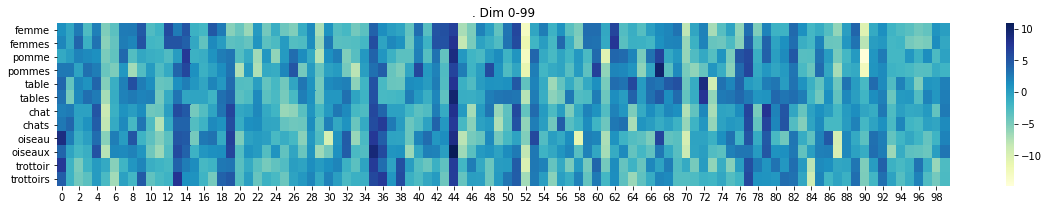

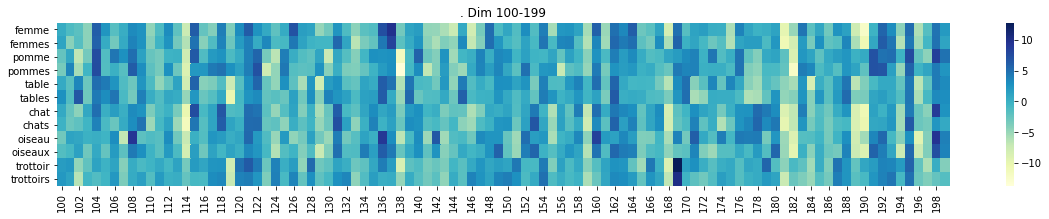

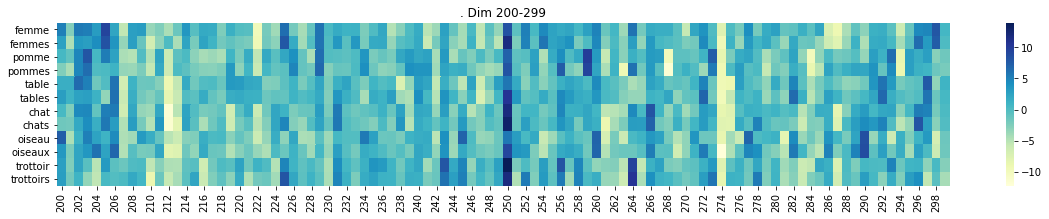

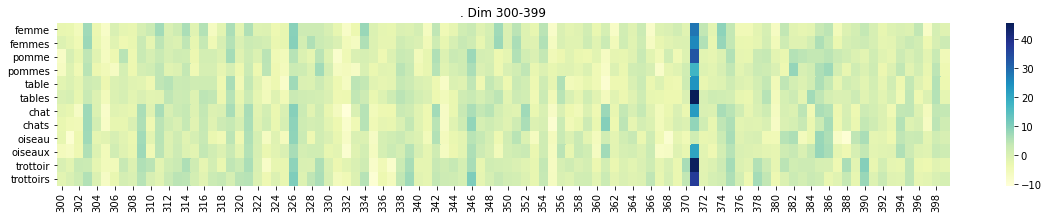

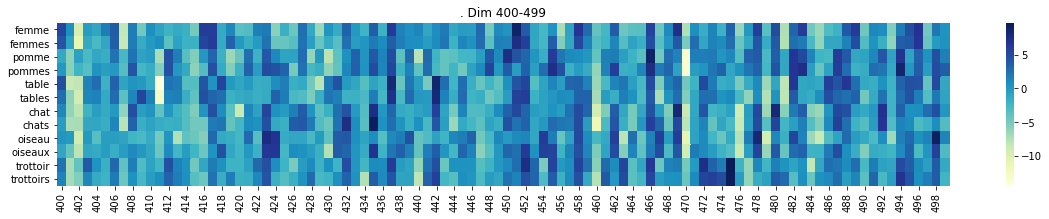

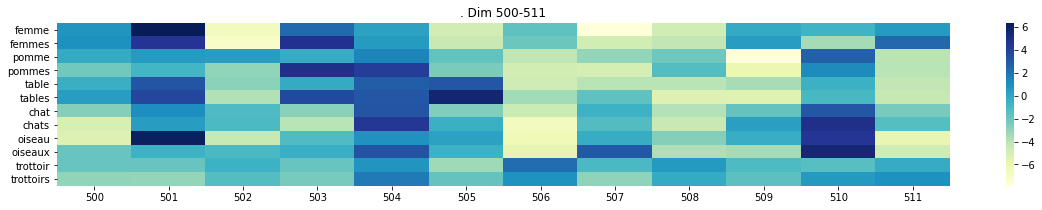

In [50]:
plot_we_heatmap(gender_df)

We can hypothesise that dimension `169` can be related to gender since there seems to be a change, however, it's not very prominent.

Dimensions `44`, `250` and `274` having close values seems to be common for most PoS as can be seen below.

Dimension `371` seems to be a peak for most nouns (and this is common for most WE) but `oiseau` which may be interesting to investigate.

# Comparison with other PoS

### Articles

For comparison we can see what are the common dimensions for other PoS. We can start with articles.

In [51]:
articles_df = create_words_df(flaubert, flaubert_tokenizer, ['une', 'la', 'La', 'Une', 'un', 'le', 'Un', 'Le', \
                                               'l\'', 'L\'', 'les', 'Les', 'des', 'Des'])

articles_df

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
une,1.344072,3.240300,2.399080,2.111244,-1.559962,-5.117366,-1.623909,3.514734,1.988107,-2.471630,...,-3.164730,3.240741,-2.199466,-3.312818,2.714769,-1.074614,-1.728244,-5.099775,1.987634,0.096111
la,0.944472,-0.045886,-2.318197,5.328461,-2.173070,-3.584076,-2.086038,0.998471,1.651997,-1.309566,...,2.326252,0.563567,0.750101,-2.263682,4.654855,-4.299432,-1.473393,-7.183373,-1.898888,-4.648422
La,1.041689,-1.226114,0.778800,2.071359,-0.826392,-4.609288,-0.065067,0.356557,-2.278197,-0.837888,...,-1.106239,3.734488,1.427076,1.116664,0.797905,-3.974285,-0.052942,-7.103919,-2.340211,-1.990373
Une,0.867360,1.838039,4.849773,0.385425,-0.234747,-3.710254,-0.946948,-1.907645,-4.819562,-1.704969,...,-3.214099,-0.391606,-0.254874,1.461512,1.137424,-2.388297,0.989012,-4.098982,0.410313,2.278425
un,0.396054,2.556391,2.050099,3.145815,-2.170840,-3.700593,0.227791,3.797452,0.519249,-3.915366,...,-2.626373,1.617317,-1.621129,-3.194036,1.242123,0.169529,-0.306793,-6.021638,1.340340,0.105668
le,-1.531721,-1.993238,-1.915129,7.880891,0.427839,-0.489946,0.983943,1.401253,4.572693,-2.691117,...,1.872909,-1.526457,-0.575344,-2.895643,2.873898,-3.013844,-3.680243,-6.430186,-1.301845,-2.328607
Un,0.203216,0.447910,4.737398,2.706300,-0.469781,-1.086083,0.616565,-0.901034,-5.461183,-4.494420,...,-2.699035,-3.461737,-0.380951,0.509069,0.312607,-0.274719,3.383513,-3.561492,-1.288949,2.111271
Le,-0.363473,-4.798340,0.567052,2.720636,1.840700,0.106619,1.786411,-0.810215,-1.443385,-3.579150,...,-1.394901,2.285573,1.772031,1.965057,0.297599,-2.360642,1.088700,-5.365827,-3.809262,-0.714528
l',-0.823263,-1.058777,-0.664779,-0.042933,-2.371103,-4.707741,-2.929627,1.904297,0.654328,-2.663612,...,4.366697,0.443675,-1.478745,-2.698137,3.007894,-2.786093,-1.941458,-7.502486,-0.107737,-3.351862
L',-0.465786,-2.845031,1.729511,-0.256601,-1.417277,-5.088926,-0.779885,1.037642,0.203805,-2.235692,...,-1.177295,2.676937,-0.402244,-1.041528,-0.384541,-3.166680,-1.214088,-5.165350,-2.065267,-1.070011


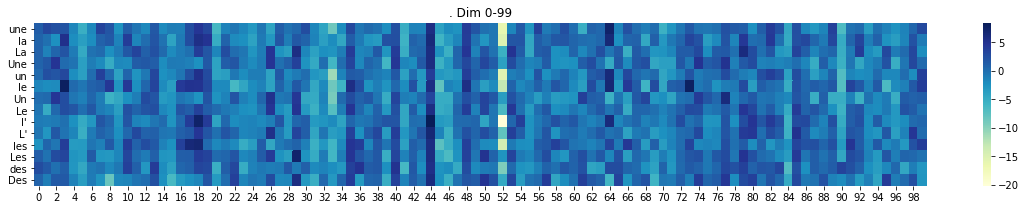

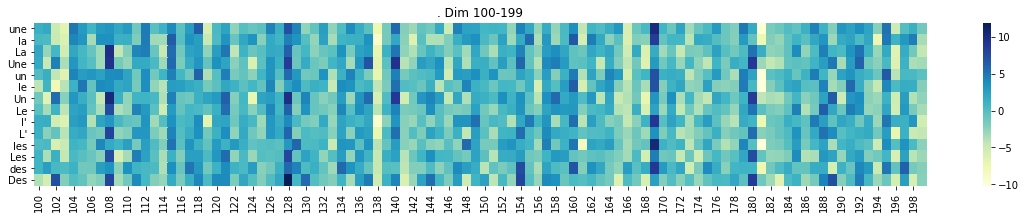

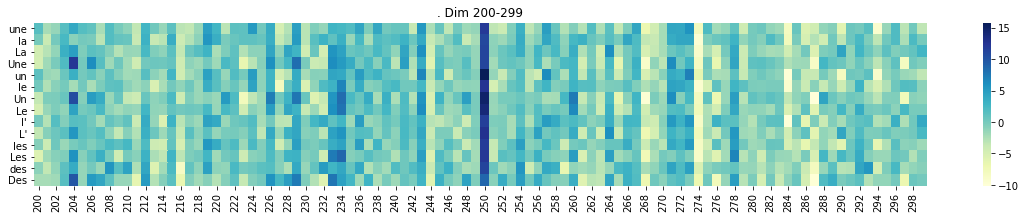

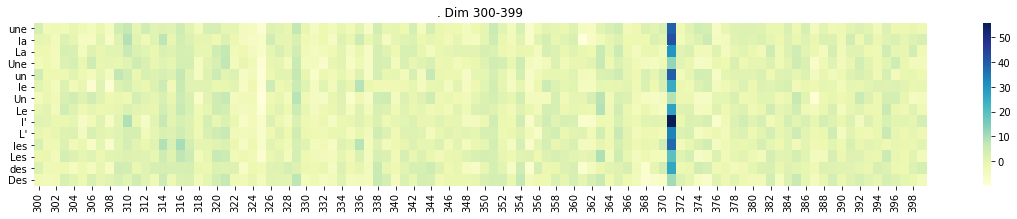

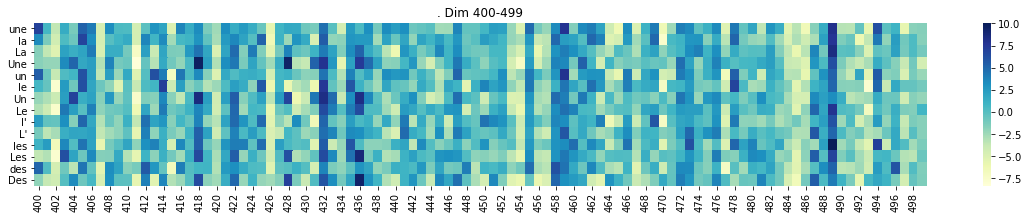

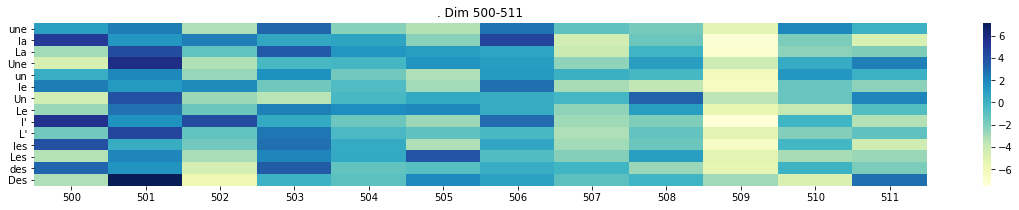

In [52]:
plot_we_heatmap(articles_df)

Similarly as for nouns, dimensions `250`, `44`, `274` have close values for articles as well. With some of the articles as well peaking at dimension `371`.

### Prepositions

In [53]:
prepositions_df = create_words_df(flaubert, flaubert_tokenizer, ['À', 'à', 'En', 'en', 'De', 'de', 'D\'', 'd\''])
prepositions_df

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
À,-1.226143,-2.901463,-3.644514,-1.464773,-1.426257,-5.827928,4.758466,3.289046,-2.090072,-2.411490,...,4.995528,3.242502,3.470222,0.169630,2.921503,-1.813625,-3.234656,-1.293444,-3.713200,4.566812
à,1.974768,-0.576334,-5.833326,0.735717,-3.318891,-6.503853,4.361490,3.981713,0.239899,-2.244637,...,2.422223,1.826112,0.189575,-1.597932,2.725673,-2.413038,-8.100518,-5.080283,0.983546,2.908330
En,4.039145,-2.818783,1.974716,-0.592957,3.320677,-6.492499,-0.371855,-2.903612,-5.020842,0.113947,...,-2.175684,0.003797,5.314668,0.511461,0.088958,-1.857548,-0.455137,-1.966379,-4.213720,2.017206
en,2.576914,3.270287,-0.159210,4.133506,-3.106245,-5.920378,-1.351406,0.741965,0.095471,0.817949,...,-2.193116,-1.313290,2.666073,-2.567001,1.708764,-3.896997,-2.981822,-3.699818,3.263599,1.584803
De,0.515094,-6.996114,0.866796,2.038086,2.592975,-2.037983,-1.348243,-2.694051,-7.984739,-0.516688,...,-4.231646,1.014231,4.176762,1.888170,-1.431512,-4.613134,-1.256278,-0.894934,-7.999540,3.116914
de,1.845124,0.428093,0.219682,4.074134,-2.360919,-5.367295,-1.095198,1.444336,-4.965213,-2.553556,...,-0.964508,2.645240,1.228463,1.984265,2.044940,-3.578699,-2.681378,-6.531273,2.105651,-0.683187
D',1.372295,-2.041111,-0.382872,-2.848407,-1.584074,-6.024531,-1.544884,-1.403281,-4.482085,-2.331695,...,-1.903706,1.100489,3.098516,-0.491693,-0.016608,-2.112240,-0.797759,-1.554591,-3.521954,-0.845686
d',0.745144,0.085958,0.295662,-0.437572,-2.919851,-7.115725,-1.678677,1.365617,-5.947295,-4.356588,...,-0.224407,1.130251,-0.071005,2.993918,1.854883,-2.039879,-0.960978,-4.450073,1.705674,-0.927319


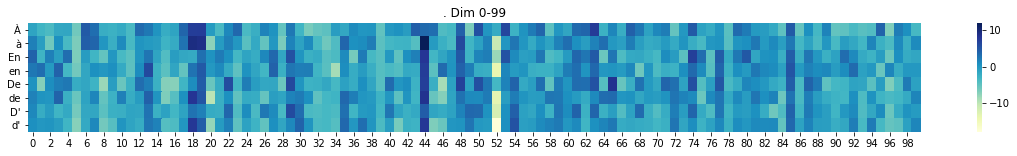

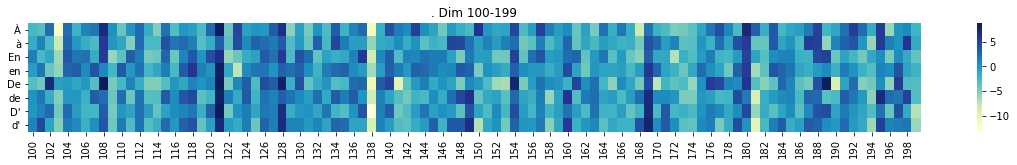

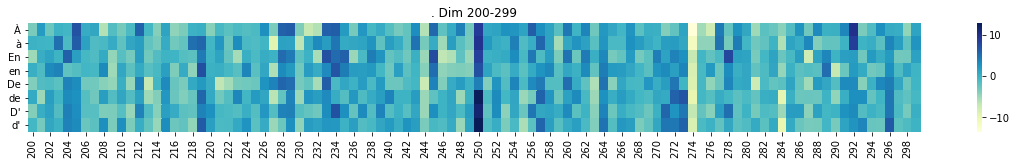

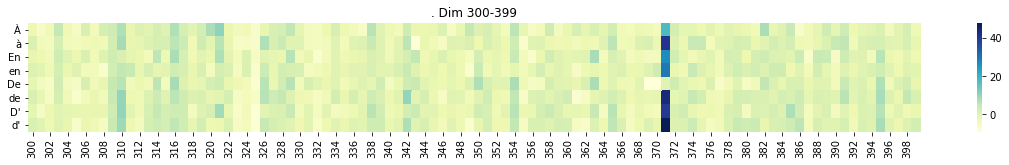

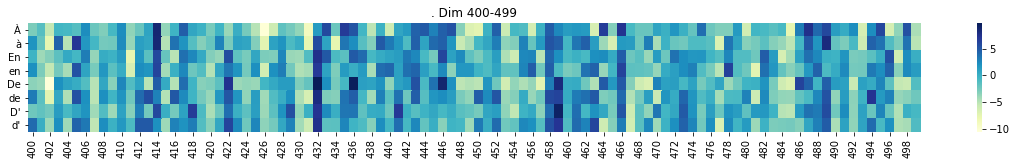

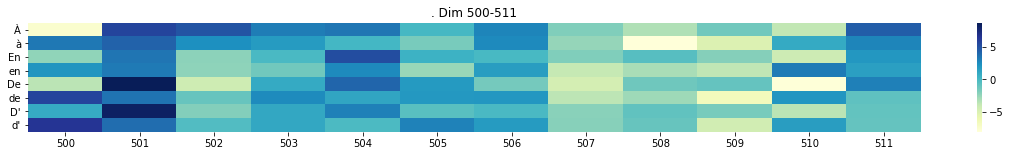

In [54]:
plot_we_heatmap(prepositions_df, size=(20,2))

For prepositions, values of dimension `274` are similarly close and low as for PoS above, however, despite being close, distribution of values in dimensions `250` and `44` is less homogenous. 

### Pronouns

In [55]:
pronouns_df = create_words_df(flaubert, flaubert_tokenizer, ['je', 'Je', 'j\'', 'J\'', 'il', 'Il', \
                                                        'elle', 'Elle', 'on', 'On', 'tu', 'Tu', 't\'', 'T\''])
pronouns_df

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
je,0.800417,1.306430,-3.336685,0.941874,1.622070,-5.182723,-1.423079,-3.292498,-4.625747,2.830352,...,-1.955684,0.271814,5.462268,-4.872373,-0.468939,-5.781447,-1.103199,-2.018844,1.366660,-3.524611
Je,2.888629,-2.420089,-0.781775,-0.254032,3.151059,-3.634354,-2.442219,-5.669333,-4.388720,0.252106,...,-2.040345,1.679221,4.035552,-1.348671,-0.307528,-5.973441,-1.205206,-0.720400,-3.502517,-1.839690
j',-0.642816,2.233364,-2.698783,-0.552333,-0.524743,-7.358105,-1.631554,-2.081510,-6.567360,1.120730,...,-0.600435,1.795543,3.139658,-3.389784,1.213691,-4.953525,-1.082571,-2.324103,0.558663,-3.133930
J',2.551514,-1.739777,-0.691188,-0.573117,0.184107,-5.326024,-1.876129,-3.758158,-5.132586,-1.201724,...,-1.811532,1.896808,1.700871,-0.915314,2.114857,-4.512546,-1.672573,-0.033881,-3.270263,-1.836902
il,-0.071076,-1.097190,-2.727794,1.730695,-1.268966,-6.125481,-2.433980,1.166383,0.625220,-1.030787,...,2.086637,0.108776,0.474831,-3.680967,-1.460606,-3.142599,-2.502694,-5.348598,2.343157,-4.783826
Il,-0.446644,-2.372924,-0.796625,0.583607,1.404332,-5.863111,-1.866984,-0.740658,-1.623545,-1.239918,...,-1.919141,0.332002,-0.619135,1.088196,-2.918743,-3.565002,-1.551113,-4.009336,-1.502968,-3.524031
elle,-0.261919,3.518227,-2.941213,-1.569861,-0.236748,-8.404625,-6.580485,-0.695669,4.360571,2.312595,...,-4.013387,2.380337,1.461217,-4.930535,-0.550303,-3.705697,-4.097578,-0.032959,1.833420,-1.199659
Elle,1.877553,2.220920,-0.700590,-0.245782,3.266495,-7.000347,-5.018175,-2.983158,1.143328,1.587070,...,-6.234504,2.384510,0.400771,-0.486073,-3.493845,-4.412861,-2.410855,-1.130447,-2.637806,-1.252073
on,-2.766037,-0.504324,-1.490095,-3.023563,-1.819587,-3.774147,3.573935,2.914249,0.821903,2.448611,...,-4.162724,3.598350,-0.793217,-3.361927,0.581486,-3.729737,-2.333976,-4.434310,-4.547379,-4.485453
On,0.255426,-0.129033,2.704786,-2.465016,0.963203,-2.492978,2.496676,1.222490,-0.703074,1.883827,...,-5.004564,3.739971,-0.301392,-0.046791,-2.428346,-2.600537,-0.703425,-5.022545,-5.772558,-4.813921


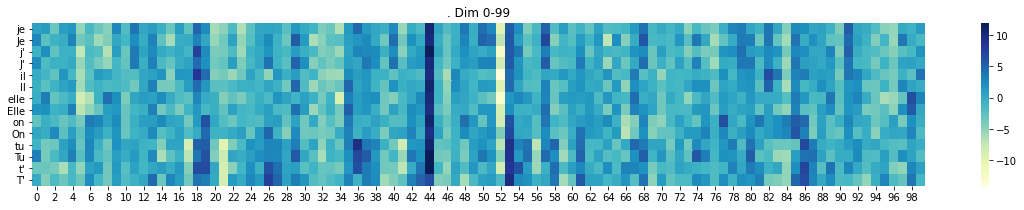

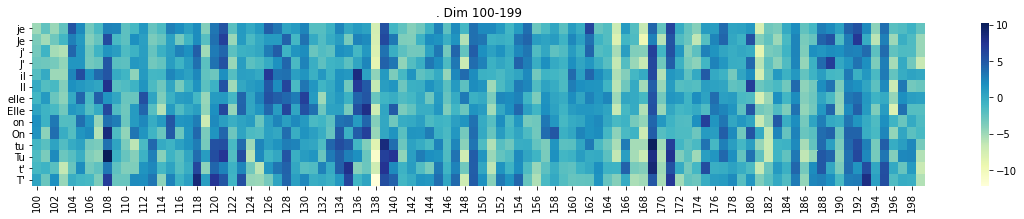

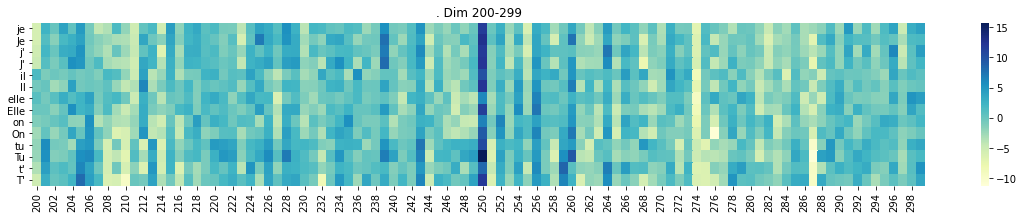

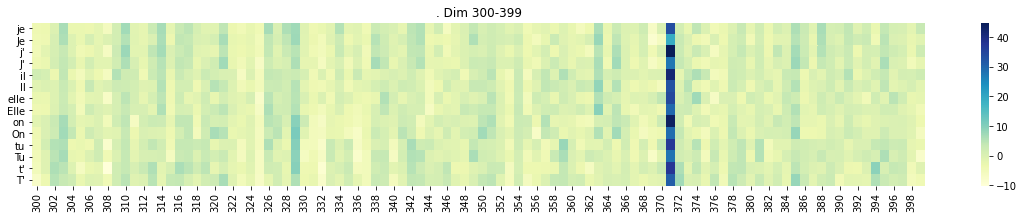

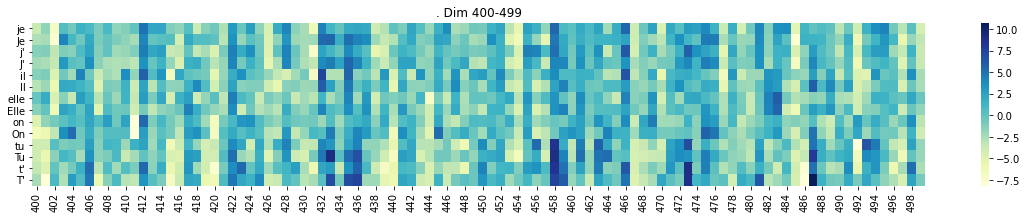

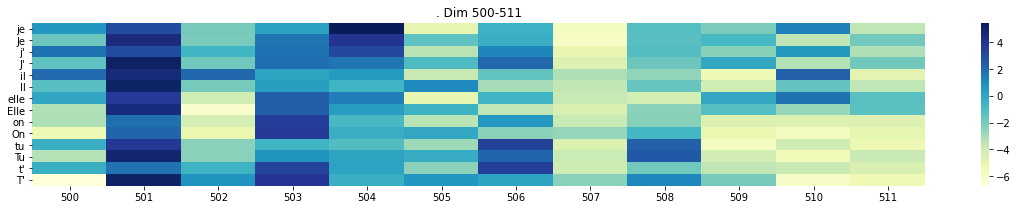

In [57]:
plot_we_heatmap(pronouns_df)

Comparing all these PoS we can hypothesize that typically WE of any PoS have low values in dimension `274` and high values in dimension `371` and relatively high values in dimensions `44` and `250`.